In [2]:
import numpy as np
import matplotlib.pyplot as plt

Calculate an optimal version of $\xi(r)$ from weighting correctly with $\mu^2-1$

In [3]:
xi_gn_p_results_rec = np.load('/home/murray/intrinsic_alignments/data/eboss_lrgpcmass_xi_gn_p_results_rec.npy')
xi_gn_x_results_rec = np.load('/home/murray/intrinsic_alignments/data/eboss_lrgpcmass_xi_gn_x_results_rec.npy')

xi_gn_p_results = np.load('/home/murray/intrinsic_alignments/data/eboss_lrgpcmass_xi_gn_p_results.npy')
xi_gn_x_results = np.load('/home/murray/intrinsic_alignments/data/eboss_lrgpcmass_xi_gn_x_results.npy')

lrg_xi_gn_p_results = np.load('/home/murray/intrinsic_alignments/notebooks/lrg_xi_gn_p_results.npy')
lrg_xi_gn_x_results = np.load('/home/murray/intrinsic_alignments/notebooks/lrg_xi_gn_x_results.npy')

rec_lrg_xi_gn_p_results = np.load('/home/murray/intrinsic_alignments/notebooks/recon_lrg_xi_gn_p_results.npy')
rec_lrg_xi_gn_x_results = np.load('/home/murray/intrinsic_alignments/notebooks/recon_lrg_xi_gn_x_results.npy')

elg_xi_gn_p_results = np.load('/home/murray/intrinsic_alignments/data/elg_xi_gn_p_results.npy')
elg_xi_gn_x_results = np.load('/home/murray/intrinsic_alignments/data/elg_xi_gn_x_results.npy')

bgs_xi_gn_p_results = np.load('/home/murray/intrinsic_alignments/notebooks/bgs_xi_gn_p_results.npy')
bgs_xi_gn_x_results = np.load('/home/murray/intrinsic_alignments/notebooks/bgs_xi_gn_x_results.npy')

In [ ]:
def monopole(  xi_gn_p , xi_gn_x , s_bins , r_perp_flat , r_par_flat ):

    xi_gn_p_flat = xi_gn_p.flatten()
    xi_gn_x_flat = xi_gn_x.flatten()

    # Calculate s for each pair of (r_perp, r_par)
    s = np.sqrt(r_perp_flat**2 + r_par_flat**2)

    s_cents = ( s_bins[1:] + s_bins[:-1] )/2.

    # Initialize arrays to store the results
    xi_p_s = np.zeros(len(s_bins) - 1)
    var_xi_p_s = np.zeros(len(s_bins) - 1)
    counts_p = np.zeros(len(s_bins) - 1)

    xi_x_s = np.zeros(len(s_bins) - 1)
    var_xi_x_s = np.zeros(len(s_bins) - 1)
    counts_x = np.zeros(len(s_bins) - 1)

    # Bin the results by s and calculate the radial averages and variances
    for i in range(len(s_bins) - 1):
        mask = (s >= s_bins[i]) & (s < s_bins[i + 1])
        if np.any(mask):  # Check if there are any elements in the mask
            xi_p_s[i] = np.mean(xi_gn_p_flat[mask])
            var_xi_p_s[i] = np.var(xi_gn_p_flat[mask])
            counts_p[i] = np.sum(mask)

            xi_x_s[i] = np.mean(xi_gn_x_flat[mask])
            var_xi_x_s[i] = np.var(xi_gn_x_flat[mask])
            counts_x[i] = np.sum(mask)


    return xi_p_s , var_xi_p_s , counts_p , xi_x_s , var_xi_x_s , counts_x , s_cents

In [47]:
def measure_weighted_xi_r( xi_2d , xi_2d_err , rp_bins , pi_bins , num_bins = 40 ):

    rp_centers = 0.5 * (rp_bins[:-1] + rp_bins[1:])
    pi_centers = 0.5 * (pi_bins[:-1] + pi_bins[1:])

    # Create 2D grids for rp and pi
    rp_grid, pi_grid = np.meshgrid(rp_centers, pi_centers, indexing='ij')
    
    r = np.sqrt(rp_grid**2 + pi_grid**2)  # Shape (200, 100)
    theta = np.arctan2(pi_grid, rp_grid).T  # Shape (200, 100)
    
    geo_weights = 1 - np.cos(theta)**2  # Shape (200, 100)
    w = 1 / (1 / geo_weights + 1 / xi_2d_err**2)  # Shape (200, 100)

    weighted_xi_2d = xi_2d * w 

    r_flat = r.flatten()
    xi_flat = weighted_xi_2d.flatten()
    weights_flat = w.flatten()

    r_bins = np.linspace( r.min(), r.max(), num_bins )  # Rebin in r
    xi_r = np.zeros(len(r_bins) - 1)

    for i in range(len(r_bins) - 1):
        mask = (r_flat >= r_bins[i]) & (r_flat < r_bins[i + 1])
        if np.any(mask):
            xi_r[i] = np.sum(xi_flat[mask]) / np.sum(weights_flat[mask])

    return xi_r, ( r_bins[1:] + r_bins[:-1] ) / 2.0


In [48]:
rpar_bins = np.linspace(-200, 200, 201 ) 
rperp_bins = np.linspace( 0, 200, 101 )

In [49]:
bgs_xi_gn_p_results.shape

(200, 100)

In [50]:
xi_r, r = measure_weighted_xi_r( bgs_xi_gn_p_results , bgs_xi_gn_p_results * 1e-9, rperp_bins, rpar_bins )

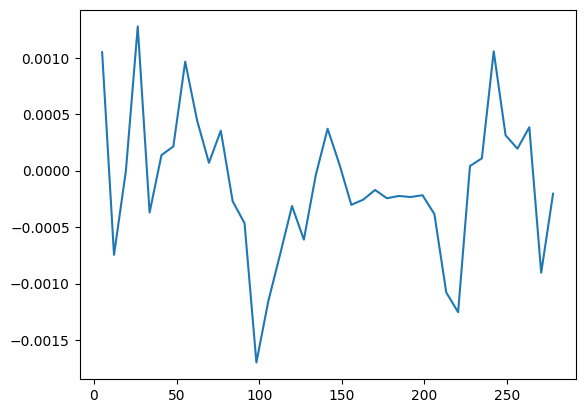

In [51]:
plt.plot( r ,  xi_r )